<a href="https://colab.research.google.com/github/trucngo100/demo-project/blob/main/online_shoppers_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn
import seaborn as sns
import sklearn
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('shoppers_cleaned.csv')
df.head()

,admin_page_cnt,admin_duration,info_page_cnt,info_duration,product_page_cnt,product_duration,bounce_rate,exit_rate,avg_page_val,special_day_0_1,month_raw,browser_type,traffic_type,visitor_type,weekend,revenue,month_num
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,returning_visitor,False,False,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,returning_visitor,False,False,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,3,returning_visitor,False,False,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,2,4,returning_visitor,False,False,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,4,returning_visitor,True,False,2


In [5]:
df.info()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin_page_cnt    12330 non-null  int64  
 1   admin_duration    12330 non-null  float64
 2   info_page_cnt     12330 non-null  int64  
 3   info_duration     12330 non-null  float64
 4   product_page_cnt  12330 non-null  int64  
 5   product_duration  12330 non-null  float64
 6   bounce_rate       12330 non-null  float64
 7   exit_rate         12330 non-null  float64
 8   avg_page_val      12330 non-null  float64
 9   special_day_0_1   12330 non-null  float64
 10  month_raw         12330 non-null  object 
 11  browser_type      12330 non-null  int64  
 12  traffic_type      12330 non-null  int64  
 13  visitor_type      12330 non-null  object 
 14  weekend           12330 non-null  bool   
 15  revenue           12330 non-null  bool   
 16  month_num         12330 non-null  int64 

Index(['admin_page_cnt', 'admin_duration', 'info_page_cnt', 'info_duration',
       'product_page_cnt', 'product_duration', 'bounce_rate', 'exit_rate',
       'avg_page_val', 'special_day_0_1', 'month_raw', 'browser_type',
       'traffic_type', 'visitor_type', 'weekend', 'revenue', 'month_num'],
      dtype='object')

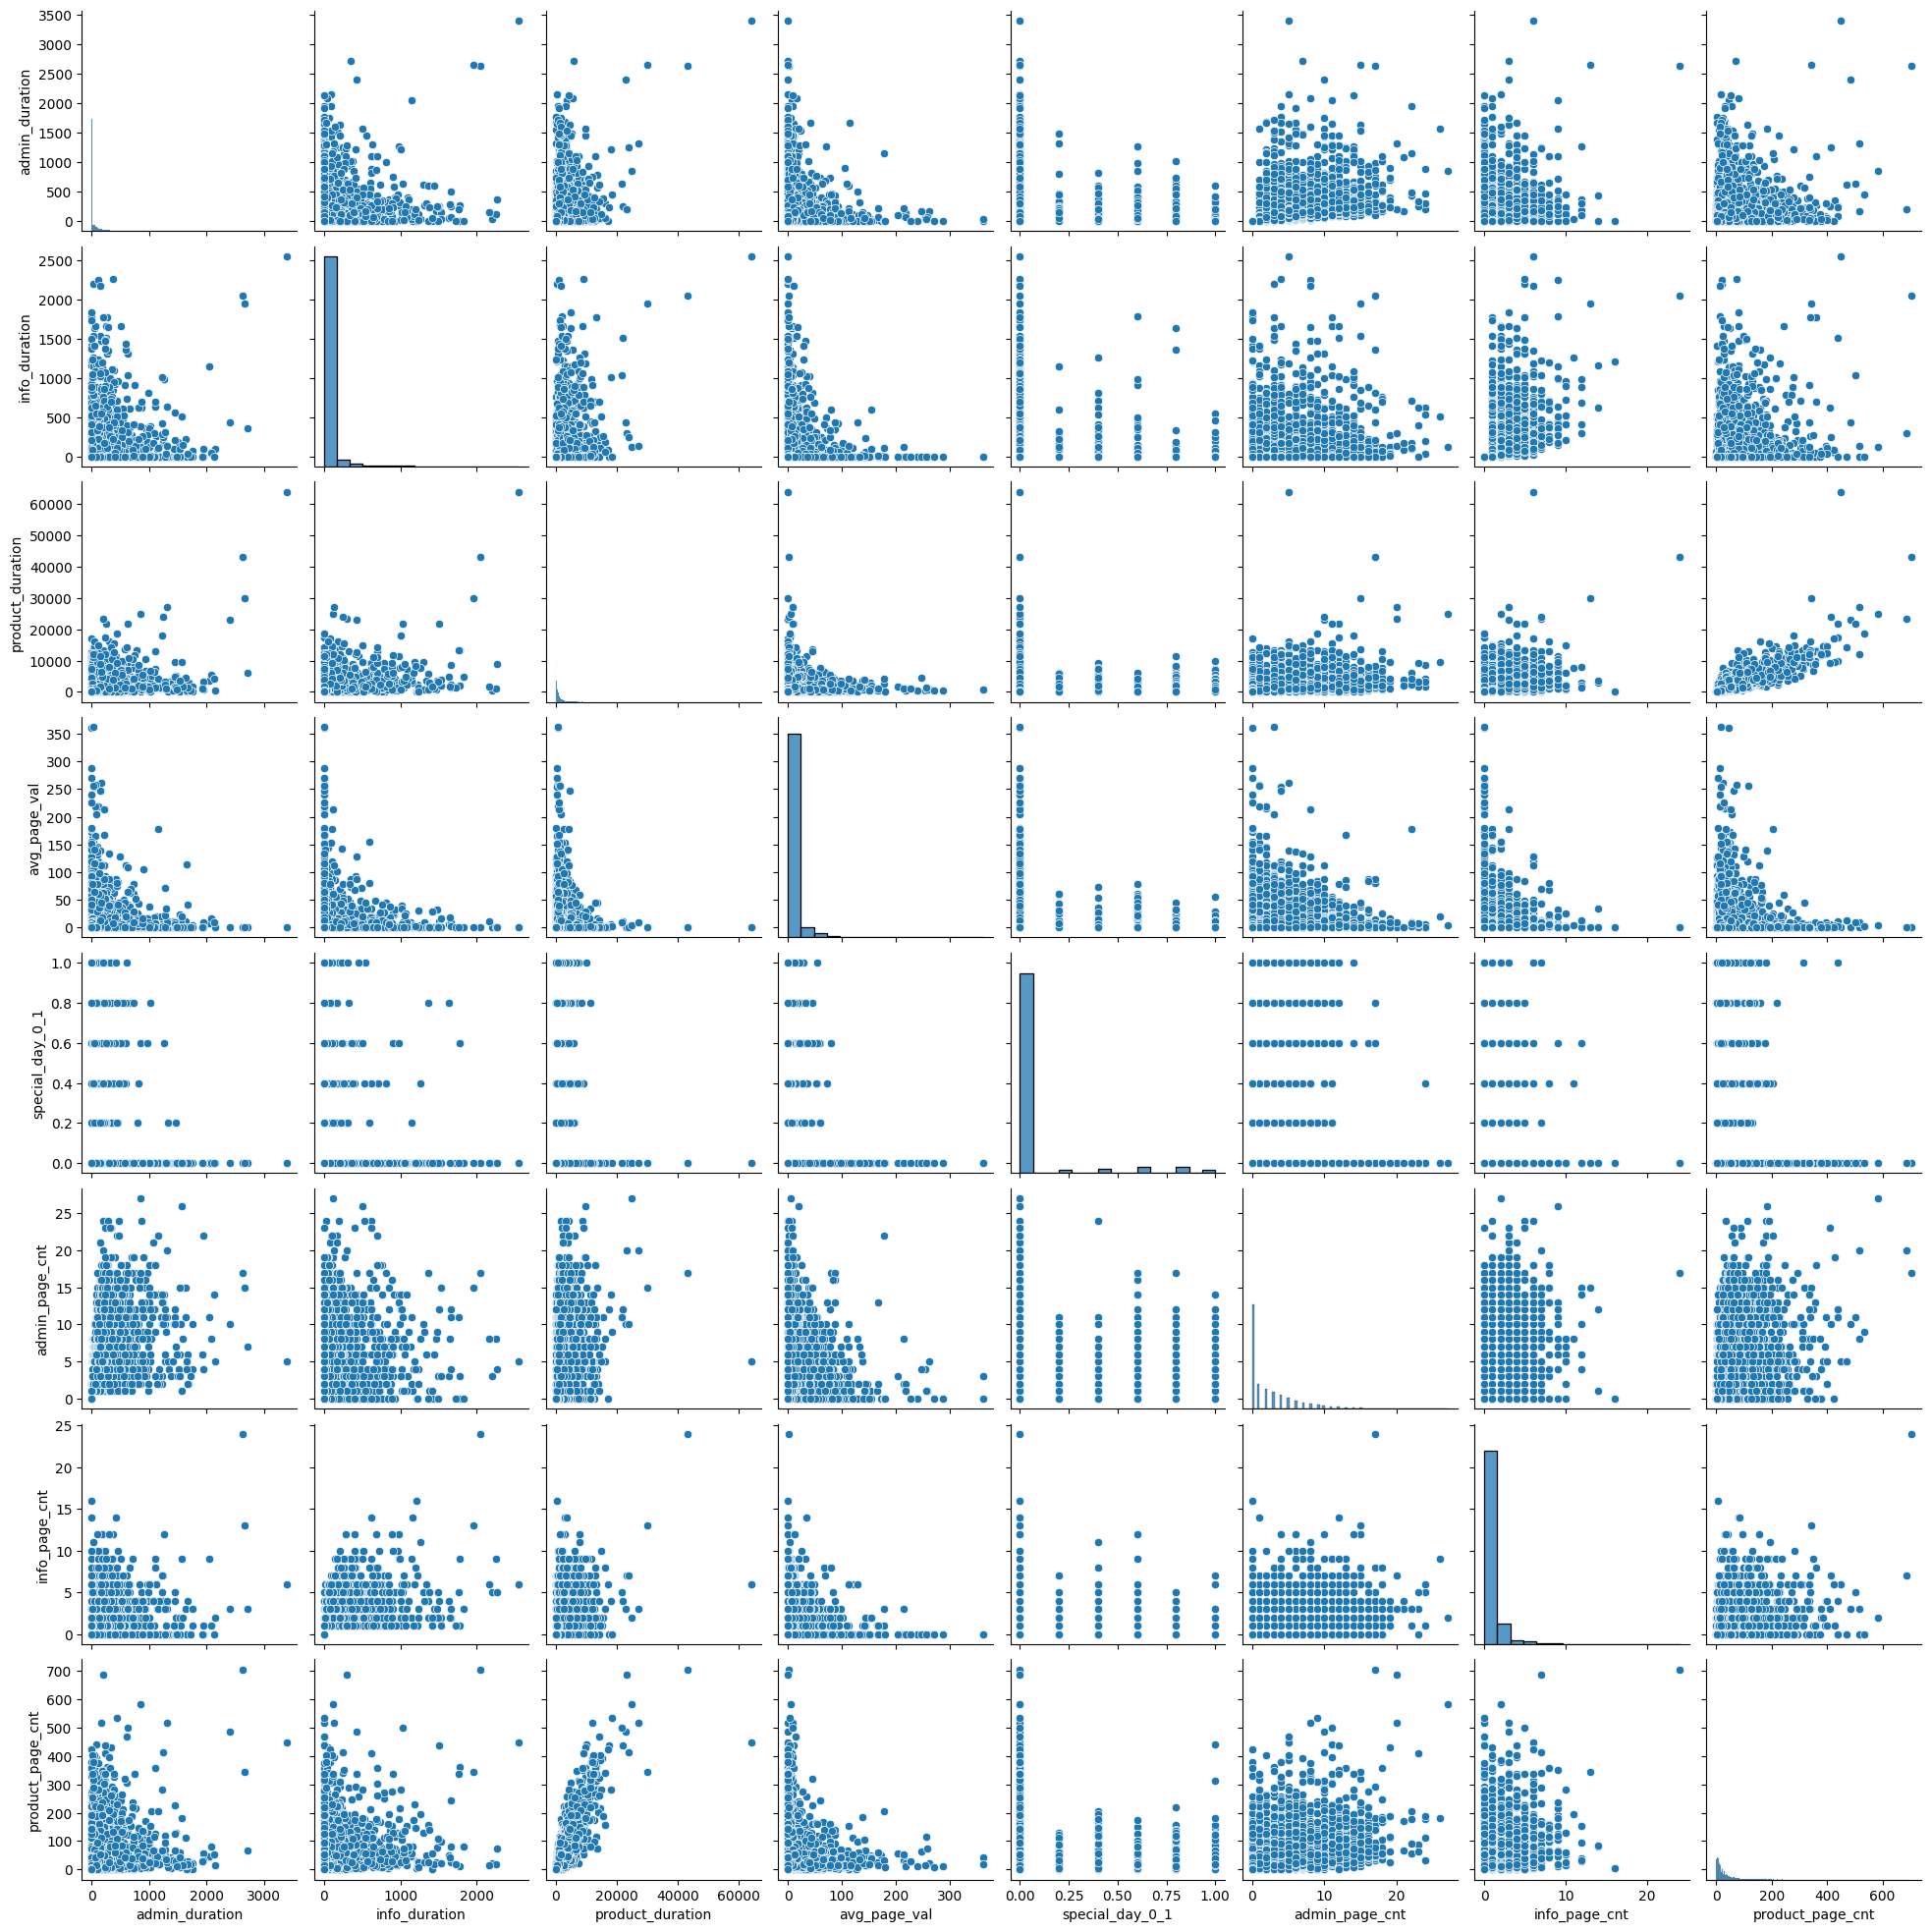

In [6]:
# find the variable that are likely to predict the page value
numeric_cols = ['admin_duration', 'info_duration', 'product_duration',\
    'avg_page_val', 'special_day_0_1',\
    'admin_page_cnt', 'info_page_cnt', 'product_page_cnt']
categorical_cols = ['month_raw','op_sys','browser_type','region',\
    'traffic_type','visitor_type','weekend']

########################################
## View if there is any pair of variables that
# violate multilinearity criteria
########################################
sns.pairplot(df[numeric_cols])